# Exercise 4.3.4 XOR 2 hidden layers

In this exercise we will implement the same neural network of XOR exercise, adding a second hidden layer

The steps to follow are:
1. Create XOR dataset
2. Plot the dataset
4. Implement the Neural Network (NN) algorithm:
    1. Initialize W's and b's
    2. Implement sigmoid function and forward function
    3. Implement cost and sigmoid derivate functions
    4. Implement backpropagation function
    5. Implement and execute the NN model
    6. Implement prediction, accuracy, and decision boundary functions
    7. Plot the prediction with its decision boundary
    8. Add 3, 4, 5, and 6 neurons to the hidden layers of the NN
5. Write some conclusions according the results obtained, comparing the previous results.
    

In [292]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

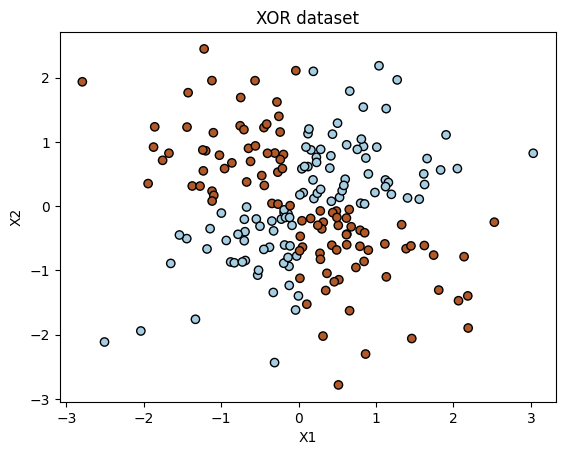

In [293]:
# 1. Generating XOR dataset
# YOUR CODE

np.random.seed(1)
X = np.random.randn(200, 2)

y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')  # type: ignore

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR dataset')

y = y.reshape(-1, 1)

In [294]:
# 2. Implement a function to intialize all the weights

# m, number of features
# nh, number of activation units in the hidden layer
# ny, number of output neurons

def init_w(m, nh, ny):

    # YOUR CODE
    np.random.seed(2)
    W1 = np.random.randn(nh, m)*0.01
    b1 = np.zeros(shape=(nh, 1))

    W2 = np.random.randn(ny, nh) * 0.01
    b2 = np.zeros(shape=(nh, 1))

    W3 = np.random.randn(ny, nh) * 0.01
    b3 = np.zeros(shape=(ny, 1))
    W = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    return W


# Testing the function
m = X.shape[1]  # features on x
nh = 2  # hidden neurons
ny = 1  # outputs units

W = init_w(m, nh, ny)
print(W['W1'].shape, 'W1:\n', W['W1'])
print(W['b1'].shape, 'b1:\n', W['b1'])
print(W['W2'].shape, 'W2:\n', W['W2'])
print(W['b2'].shape, 'b2:\n', W['b2'])
print(W['W3'].shape, 'W3:\n', W['W3'])
print(W['b3'].shape, 'W3:\n', W['b3'])


(2, 2) W1:
 [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]]
(2, 1) b1:
 [[0.]
 [0.]]
(1, 2) W2:
 [[-0.01793436 -0.00841747]]
(2, 1) b2:
 [[0.]
 [0.]]
(1, 2) W3:
 [[ 0.00502881 -0.01245288]]
(1, 1) W3:
 [[0.]]


In [295]:
# Sigmoid function
def sigmoid(z):
    # YOUR CODE
    g = 1/(1+np.exp(-z))

    return g

# Implement forward propagation to calculate ouput probabilites


def forward(x, W):
    W1 = W['W1']
    b1 = W['b1']
    W2 = W['W2']
    b2 = W['b2']
    W3 = W['W3']
    b3 = W['b3']
    
    # YOUR CODE
    
    a1 = x
    z2 = np.dot(a1, W1.T) + b1.T
    a2 = sigmoid(z2)

    z3 = np.dot(a2, W2.T) + b2.T
    a3 = sigmoid(z3)
    
    z4 = np.dot(a3, W3.T) + b3
    a4 = sigmoid(z4)


    Z = {'Z2': z2, 'a2': a2, 'Z3': z3, 'a3': a3, 'Z4': z4, 'a4': a4}
    return a4, Z


In [296]:
a4, Z = forward(X, W)
print('a4 =', a4.shape)

a4 = (200, 1)


In [297]:
# Cost function
def cost(a, y):
    # YOUR CODE
    m = len(y)
    J = np.sum((a - y) ** 2) / (2 * m)
    return J

# Derivative of sigmoid function


def d_sigmoid(z):
    # YOUR CODE
    ds = sigmoid(z) * (1-sigmoid(z))
    return ds


In [298]:
print('Cost =', cost(a4, y))

Cost = 0.12500042414899087


In [299]:
# 5. Backpropagation algorithm

def backp(W, Z, X, y):
    m = X.shape[1]

    W1 = W['W1']
    W2 = W['W2']
    W3 = W['W3']
    a2 = Z['a2']
    a3 = Z['a3']
    a4 = Z['a4']
    Z2 = Z['Z2']
    Z3 = Z['Z3']
    Z4 = Z['Z4']

    # YOUR CODE
    d4 = a4 - y
    d3 = np.dot(d4, W3) * d_sigmoid(Z3)

    d2 = np.dot(d3, W2.T) * d_sigmoid(Z2)

    dW1 = (1/m) * np.dot(d2.T, X)
    dW2 = (1/m) * np.dot(d3.T, a2)
    dW3 = (1/m) * np.dot(d4.T, a3)

    db1 = (1/m) * np.sum(d2)
    db2 = (1/m) * np.sum(d3)
    db3 = (1/m) * np.sum(d4)

    grad = {'dW1': dW1, 'dW2': dW2, 'dW3': dW3,
            'db1': db1, 'db2': db2, 'db3': db3}

    return grad


In [300]:
def xor_model(x, y, nh, alpha=0.001, epochs=10000):
    np.random.seed(2)
    m = x.shape[1]
    ny = 1
    # 1. Initialize W's
    # YOUR CODE
    W = init_w(m, nh, ny)

    # Initialize forward propagation to calculate initial cost
    # YOUR CODE
    a4, Z = forward(x, W)

    J = []
    for i in range(epochs):

        # 2. Calculate forward propagation
        # YOUR CODE
        a4, Z = forward(x, W)
        J.append(cost(a4, y))
        # 3. Calculate backpropagation
        # YOUR CODE
        grad = backp(W, Z, x, y)

        # 4. Update w's and b's here
        # YOUR CODE
        W['W1'] = W['W1'] - alpha * grad['dW1']
        W['W2'] = W['W2'] - alpha * grad['dW2']
        W['W3'] = W['W3'] - alpha * grad['dW3']
        W['b1'] = W['b1'] - alpha * grad['db1']
        W['b2'] = W['b2'] - alpha * grad['db2']
        W['b3'] = W['b3'] - alpha * grad['db3']

    print('Final cost:', J[epochs-1])
    return W, J


Final cost: 0.12499999945538208
W1 = [[-0.00416424 -0.00056158]
 [-0.02135869  0.01640377]]
b1 =  [[6.45002119e-09]
 [6.45002119e-09]]
W2 =  [[-0.01792715 -0.00839566]
 [-0.01794793 -0.00845758]]
b2 =  [[-3.86033838e-06]
 [-3.86033838e-06]]
W3 =  [[ 0.00622618 -0.01125564]]
b3 =  [[0.00249692]]


Text(0, 0.5, 'cost')

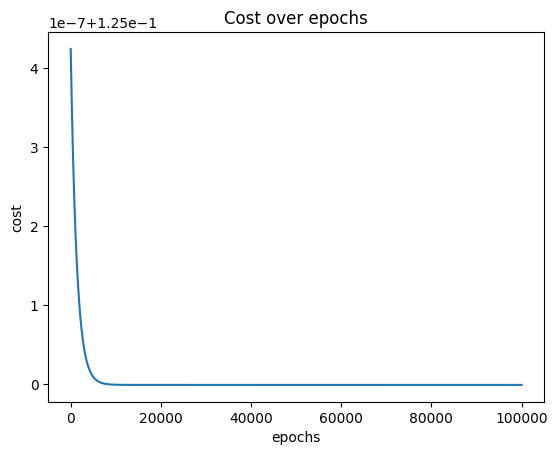

In [301]:
# Now call your model with 2 neurons on hidden layer, alpha 0.1 and 6000 epochs

#YOUR CODE
W, J = xor_model(X, y, nh, alpha=0.00001, epochs=100000)


print('W1 =', W['W1'])
print("b1 = ", W['b1'])
print("W2 = ", W['W2'])
print("b2 = ", W['b2'])
print("W3 = ", W['W3'])
print("b3 = ", W['b3'])

#5. Plot Cost
plt.plot(J)
plt.title('Cost over epochs')
plt.xlabel('epochs')
plt.ylabel('cost')

In [302]:
def predict(x, W):
    
    #YOUR CODE
    a3, Z = forward(x, W)
    y_hat = list(map(lambda x: 1 if x > 0.5 else 0, a3))
    y_hat = np.array(y_hat)
    y_hat = y_hat.reshape(-1,1)    
    return y_hat

def accuracy(y_hat, y):
    
    #YOUR CODE
    m = len(y)
    tptn = (y == y_hat).sum()
    acc = tptn /m
    
    return acc

def decision_boundary(x, y, w, ax):
    
    #Minimos y maximos de la gráfica
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    h = 0.01
    
    #Matriz para graficar una superficie
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    #Valores para que dar color a la superficie dependiendo de las predicciones
    Z1 = predict(np.c_[xx.ravel(), yy.ravel()], w)
    
    #Convertir en matriz el vector de predicciones
    Z1 = Z1.reshape(xx.shape)
    
    #Graficar la superficie
    ax.contourf(xx, yy, Z1, cmap =plt.cm.tab20c)
    ax.scatter(x[:, 0], x[:, 1], c = y.squeeze(), cmap=plt.cm.tab20c)

Text(0, 0.5, 'x2')

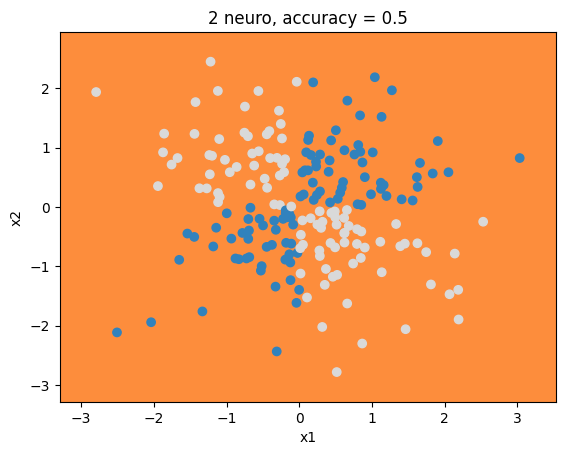

In [303]:
#Plot the XOR function and its decision boundary

#YOUR CODE
y_hat = predict(X,W)
acc = accuracy(y_hat,y)
ax = plt.subplot()
decision_boundary(X,y,W,ax)
ax.set_title('2 neuro, accuracy = ' + str(acc))
ax.set_xlabel('x1')
ax.set_ylabel('x2')

Final cost: 4.871922453529505e-07
Final cost: 0.01756000482701747
Final cost: 3.597506658978275e-05
Final cost: 0.01882004160309899


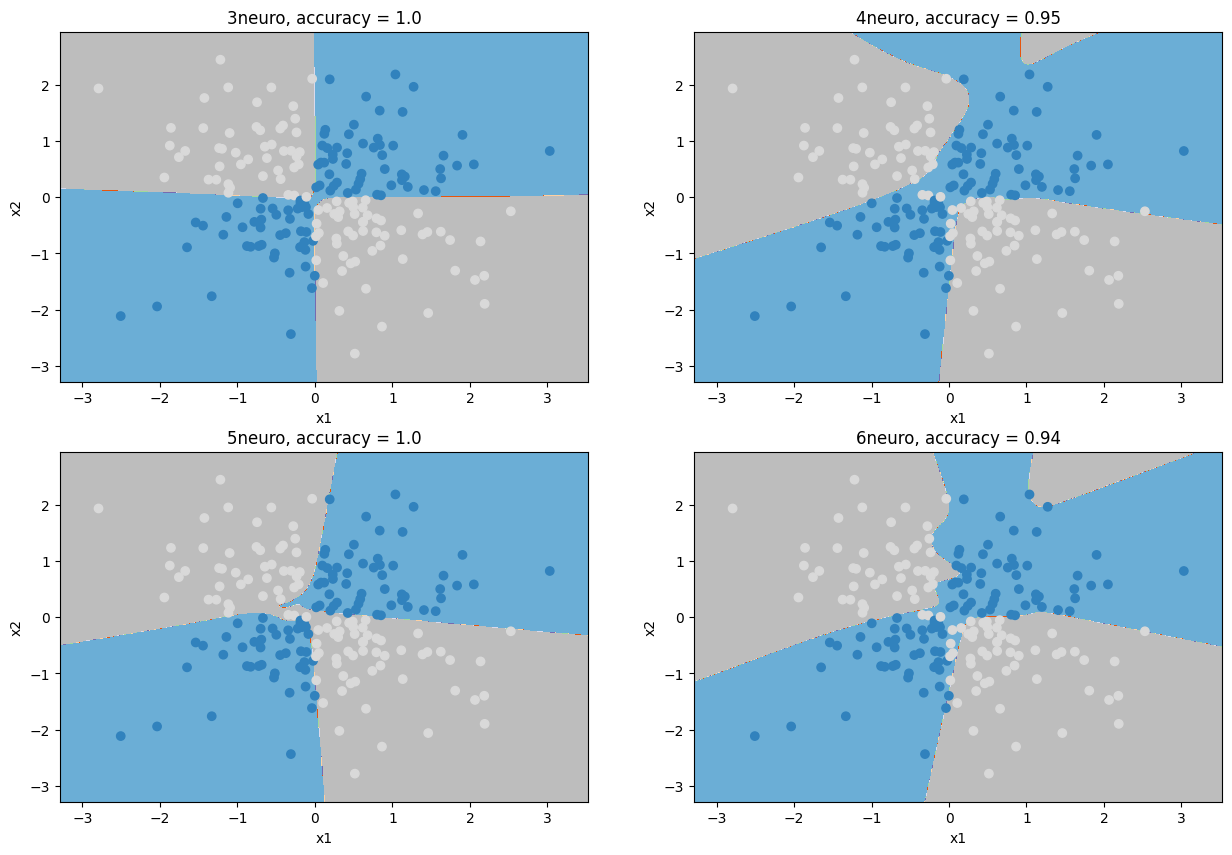

In [305]:
# YOUR CODE
hidden = [3, 4, 5, 6]

axi = 1

f, axa = plt.subplots(2, 2, figsize=(15, 10))
for h in hidden:
    W, J = xor_model(X, y, h, alpha=0.01, epochs=100000)
    y_hat = predict(X, W)
    acc = accuracy(y_hat, y)
    ax = plt.subplot(2, 2, axi)
    axi = axi + 1
    decision_boundary(X,y,W,ax)
    ax.set_title(str(h) + 'neuro, accuracy = ' + str(acc))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
